In [1]:
# Jessica Gallo
# Created: 2/12/2020
# Last modified: 2/27/2020
# Pattern Recognition & Neural Networks
# Descriptive Statistics, Classification and Analysis Using Python & Python Libraries
# Part 2

In [2]:
# imports for Listing 6
# from pandas import read_csv  # Pairwise Pearson Corr/Skew/Histograms/Density/Box & Whisker/Correlation Matrix
from pandas import set_option  # Pairwise Pearson Corr
from matplotlib import pyplot  # Histograms/Density/Box & Whisker/Correlation Matrix
import numpy  # Correlation Matrix

In [3]:
# imports for Listing 7
# from pandas import read_csv  # Rescaling/Standardize/Normalize
from numpy import set_printoptions  # Rescaling/Standardize/Normalize/Binarize
from sklearn.preprocessing import MinMaxScaler, Binarizer  # Rescaling
from sklearn.preprocessing import StandardScaler  # Standardize
from sklearn.preprocessing import Normalizer  # Normalize
import pandas as pd

In [4]:
# Dataset for both Listings 6 & 7
filename = "./Downloads/data_banknote_authentication.txt"  # csv/text file
names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']  # columns on dataset
# data = read_csv(filename, names=names)  # reads the info on csv/txt file
dataSetCsv = pd.read_csv(filename, ',', error_bad_lines=False, names=names)
dataset = pd.DataFrame(dataSetCsv)

In [5]:
# ###############################################################################
# LISTING 6
# ###############################################################################

In [8]:
# -----------------------------
# Pairwise Pearson Correlation |
# -----------------------------
set_option('display.width', 100)  # width of the display in characters
set_option('precision', 3)  # sets number of digits
correlations = dataset.corr(method='pearson')  # corr() function to calculate correlation matrix
print("Pairwise Pearson Correlction of Bank Authentication Dataset:")
print(correlations)

Pairwise Pearson Correlction of Bank Authentication Dataset:
          variance  skewness  curtosis  entropy  class
variance     1.000     0.264    -0.381    0.277 -0.725
skewness     0.264     1.000    -0.787   -0.526 -0.445
curtosis    -0.381    -0.787     1.000    0.319  0.156
entropy      0.277    -0.526     0.319    1.000 -0.023
class       -0.725    -0.445     0.156   -0.023  1.000


In [9]:
# ------------------------
# Skew for Each Attribute |
# ------------------------
skew = dataset.skew()  # calculates skew of dataset
print("\nSkewness for Each Attribute of Bank Authentication Dataset:")
print(skew)


Skewness for Each Attribute of Bank Authentication Dataset:
variance   -0.149
skewness   -0.394
curtosis    1.089
entropy    -1.022
class       0.223
dtype: float64


In [10]:
# -------------------------
# Univariable Density Plot |
# -------------------------


Univariable Histogram of Bank Authentication Dataset:


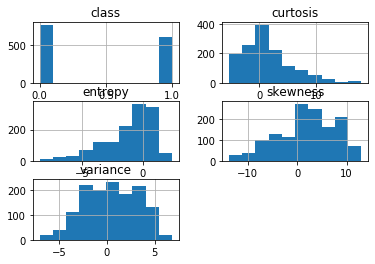

In [12]:
# Histogram
# =========
dataset.hist()  # calculates histogram
print("\nUnivariable Histogram of Bank Authentication Dataset:")
pyplot.show()  # displays the plot


Univariable Density Plots of Bank Authentication Dataset:


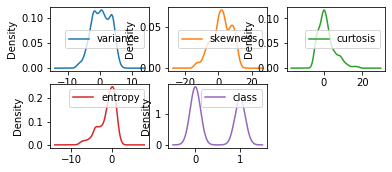

In [13]:
# Density Plots
# =============
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
# subplots True: make separate subplot for each column
# sharex False: an ax is passed in
print("\nUnivariable Density Plots of Bank Authentication Dataset:")
pyplot.show()  # displays the plot


Univariable Box and Whisker Plots of Bank Authentication Dataset:


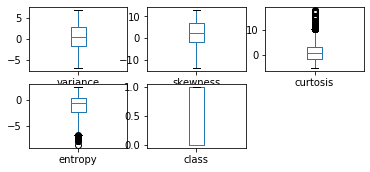

In [14]:
# Box and Whisker Plots
# =====================
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False)
print("\nUnivariable Box and Whisker Plots of Bank Authentication Dataset:")
pyplot.show()  # displays plot


Correlation Matrix Plot for Banknote Authentication Dataset:


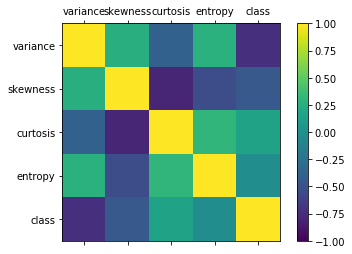

In [15]:
# ------------------------
# Correlation Matrix Plot |
# ------------------------
fig = pyplot.figure()
ax = fig.add_subplot(111)  # subplot grid parameters 1x1 grid, 1st subplot
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)  # creates colorbar on axes
ticks = numpy.arange(0,5,1)  # returns evenly spaced values within a given interval
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
print("\nCorrelation Matrix Plot for Banknote Authentication Dataset:")
pyplot.show()  # displays plot

In [16]:
# ###############################################################################
# LISTING 7
# ###############################################################################

In [17]:
# Listing 7 data
array = dataset.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]

In [18]:
# ---------------
# Rescaling Data |
# ---------------
scaler = MinMaxScaler(feature_range=(0,1))  # desired range of transformed data
rescaledX = scaler.fit_transform(X)  # fit to data, then transform it
set_printoptions(precision=3)  # sets number of digits
print("\nRescaling Data between 0 and 1 from Banknote Authentication Dataset:")
print(rescaledX[0:2,:])


Rescaling Data between 0 and 1 from Banknote Authentication Dataset:
[[0.769 0.84  0.107 0.737]
 [0.836 0.821 0.122 0.644]]


In [19]:
# -----------------
# Standardize Data |
# -----------------
scaler = StandardScaler().fit(X)  # standardize features by removing the mean and scaling to unit variance
rescaledX = scaler.transform(X)
set_printoptions(precision=3)  # sets number of digits
print("\nStandardize Data from Banknote Authentication Dataset:")
print(rescaledX[0:2,:])


Standardize Data from Banknote Authentication Dataset:
[[ 1.122  1.149 -0.976  0.355]
 [ 1.447  1.064 -0.895 -0.129]]


In [20]:
# ---------------
# Normalize Data |
# ---------------
scaler = Normalizer().fit(X)  # normalize samples individually to unit norm
normalizedX = scaler.transform(X)
set_printoptions(precision=3)  # sets number of digits
print("\nNormalized Data from Banknote Authentication Dataset:")
print(normalizedX[0:2,:])


Normalized Data from Banknote Authentication Dataset:
[[ 0.369  0.883 -0.286 -0.046]
 [ 0.465  0.836 -0.252 -0.15 ]]


In [21]:
# --------------
# Binarize Data |
# --------------
binarizer = Binarizer(threshold=0.0).fit(X)  # binarize data according to threshold
# threshold: feature values below or equal to this are replaced by 0, above it by 1
# fit is there to implement the usual API
binaryX = binarizer.transform(X)
set_printoptions(precision=3)  # sets number of digits
print("\nBinarized Data from Banknote Authentication Dataset:")
print(binaryX[0:2,:])


Binarized Data from Banknote Authentication Dataset:
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]]
